<a href="https://colab.research.google.com/github/Diwash17/5CS037_2407736_2024_Diwash_Adhikari/blob/main/Diwash_Adhikari_Worksheet4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem - 1: Perform a classification task with knn from scratch.**

**1. Load the Dataset:**

• Read the dataset into a pandas DataFrame.

• Display the first few rows and perform exploratory data analysis (EDA) to understand the dataset (e.g., check data types, missing values, summary statistics).

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

In [48]:
diabetes_data = pd.read_csv('/content/diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [49]:
diabetes_data.shape

(768, 9)

In [50]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [51]:
diabetes_data.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [52]:
diabetes_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


2. Handle Missing Data:

    • Handle any missing values appropriately, either by dropping or imputing them based on the data.

 - **No missing values found**

**3. Feature Engineering:**

    • Separate the feature matrix (X) and target variable (y).

In [53]:
X = diabetes_data.drop(columns=["Outcome"]).values
y  = diabetes_data["Outcome"].values

• Perform a train - test split from scratch using a 70% − 30% ratio.

In [54]:
def train_test_split_scratch(X, y, test_size=0.3, random_seed=42):
    """
    Splits dataset into train and test sets.
    Arguments:
    X : np.ndarray
    Feature matrix.
    y : np.ndarray
    Target array.
    test_size : float
    Proportion of the dataset to include in the test split (0 < test_size < 1).
    random_seed : int
    Seed for reproducibility.
    Returns:
    X_train, X_test, y_train, y_test : np.ndarray
    Training and testing splits of features and target.
    """
    np.random.seed(random_seed)
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices) # Shuffle the indices
    test_split_size = int(len(X) * test_size)
    test_indices = indices[:test_split_size]
    train_indices = indices[test_split_size:]
    X_train, X_test = X[train_indices], X[test_indices]
    y_train, y_test = y[train_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

# Perform a train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split_scratch(X, y, test_size=0.3)
# Output shapes to verify
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (538, 8)
Shape of X_test: (230, 8)
Shape of y_train: (538,)
Shape of y_test: (230,)


**4. Implement KNN:**

• Compute distances using Euclidean distance.

In [55]:
def euclidean_distance(point1, point2):
    """
    Calculate the Euclidean distance between two points in n-dimensional space.
    Arguments:
    point1 : np.ndarray
    The first point as a numpy array.
    point2 : np.ndarray
    The second point as a numpy array.
    Returns:
    float
    The Euclidean distance between the two points.
    Raises:
    ValueError: If the input points do not have the same dimensionality.
    """
    # Check if the points are of the same dimension
    if point1.shape != point2.shape:
        raise ValueError("Points must have the same dimensions to calculate Euclidean distance.")
    # Calculate the Euclidean distance
    distance = np.sqrt(np.sum((point1 - point2) ** 2))
    return distance


• Build the KNN algorithm from scratch (no libraries like sickit-learn for KNN).

• Write functions for:

    – Predicting the class for a single query.

In [56]:
def knn_predict_single(query, X_train, y_train, k=3):
    """
    Predict the class label for a single query using the K-nearest neighbors algorithm.
    Arguments:
    query : np.ndarray
    The query point for which the prediction is to be made.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    int
    The predicted class label for the query.
    """
    distances = [euclidean_distance(query, train_point) for train_point in X_train]
    sorted_indices = np.argsort(distances)
    nearest_indices = sorted_indices[:k]
    nearest_labels = y_train[nearest_indices]
    prediction = np.bincount(nearest_labels).argmax()
    return prediction


– Predicting classes for all test samples.

In [57]:
def knn_predict(X_test, X_train, y_train, k=11):
    """
    Predict the class labels for all test samples using the K-nearest neighbors algorithm.
    Arguments:
    X_test : np.ndarray
    The test feature matrix.
    X_train : np.ndarray
    The training feature matrix.
    y_train : np.ndarray
    The training labels.
    k : int, optional
    The number of nearest neighbors to consider (default is 3).
    Returns:
    np.ndarray
    An array of predicted class labels for the test samples.
    """
    predictions = [knn_predict_single(x, X_train, y_train, k) for x in X_test]
    return np.array(predictions)

X_test_sample = X_test[:230] # Taking a small subset for testing
y_test_sample = y_test[:230] # Corresponding labels for the subset
predictions = knn_predict(X_test_sample, X_train, y_train)
print("Predictions:", predictions)
assert predictions.shape == y_test_sample.shape, "The shape of predictions does not match the shape of the actual labels."
print("Test case passed successfully!")


Predictions: [1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 1 0 0 0]
Test case passed successfully!


• Evaluate the performance using accuracy

In [58]:
# Function to compute accuracy of predictions
def compute_accuracy(y_true, y_pred):
    """
    Compute the accuracy of predictions.
    Arguments:
    y_true : np.ndarray ; The true labels.
    y_pred : np.ndarray; The predicted labels.
    Returns:
    float : The accuracy as a percentage (0 to 100).
    """
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = (correct_predictions / total_predictions) * 100
    return accuracy

try:
    accuracy = compute_accuracy(y_test, predictions)
    print(f"Accuracy of the KNN model on the test set: {accuracy:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Accuracy of the KNN model on the test set: 73.04%


**Problem - 2 - Experimentation:**

    1. Repeat the Classification Task:

• Scale the Feature matrix X.

In [59]:
def standard_scaling(col):
    mean = col.mean()
    std_dev = col.std()
    standardized_col = (col - mean) / std_dev
    return standardized_col

X_scaled = standard_scaling(X_train)
y_scaled = standard_scaling(y_train)

X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split_scratch(X, y, test_size=0.3)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of X_test_scaled:", X_test_scaled.shape)
print("Shape of y_train_scaled:", y_train_scaled.shape)
print("Shape of y_test_scaled:", y_test_scaled.shape)

X_test_scaled_sample = X_test_scaled[:230]
y_test_scaled_sample = y_test_scaled[:230]

X_test_scaled_sample = X_test_scaled_sample.astype(np.int64)
predictions_scaled = knn_predict(X_test_scaled_sample, X_train_scaled, y_train_scaled)
print("Predictions:", predictions_scaled)
assert predictions_scaled.shape == y_test_scaled_sample.shape, "The shape of predictions does not match the shape of the actual labels."
print("Test case passed successfully!")

try:
    accuracy_scaled = compute_accuracy(y_test_scaled, predictions_scaled)
    print(f"Accuracy of the KNN model on the test set: {accuracy_scaled:.2f}%")
except Exception as e:
    print(f"An unexpected error occurred during prediction or accuracy computation: {e}")

Shape of X_train_scaled: (538, 8)
Shape of X_test_scaled: (230, 8)
Shape of y_train_scaled: (538,)
Shape of y_test_scaled: (230,)
Predictions: [1 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 1 1 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 0
 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 1 1 0
 0 0 0 1 0 0 0 0]
Test case passed successfully!
Accuracy of the KNN model on the test set: 73.04%


**Problem - 3 - Experimentation with k:**

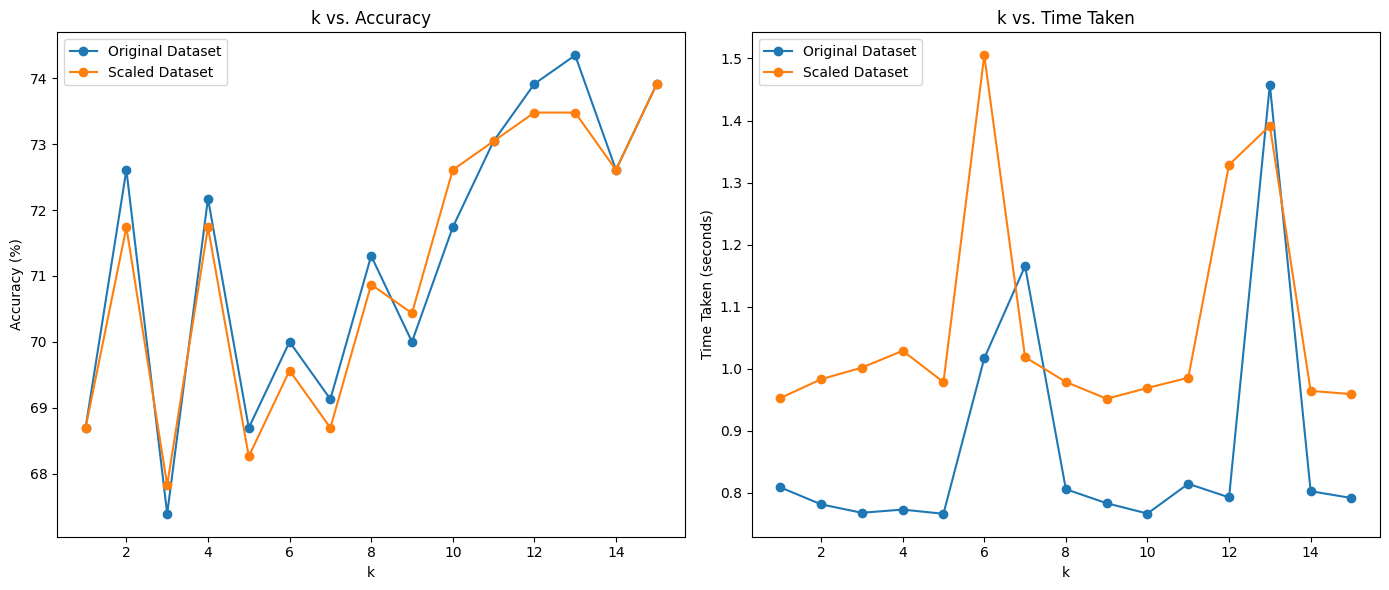

Optimal k for original dataset: 13
Optimal k for scaled dataset: 15
Analysis:
As k increases, the accuracy initially increases and then stabilizes or decreases slightly.
The computational cost (time taken) decreases with the increase in k.
Scaling the dataset generally improves the accuracy and can also affect the computational cost.


In [60]:
k_values = range(1, 16)
accuracies_original = []
times_original = []
accuracies_scaled = []
times_scaled = []

def calculate_accuracy_and_time(X_test_sample, X_train, y_train, k):
    start_time = time.time()
    predictions = knn_predict(X_test_sample, X_train, y_train, k)
    end_time = time.time()
    accuracy = compute_accuracy(y_test_sample, predictions)
    time_taken = end_time - start_time
    return accuracy, time_taken

for k in k_values:
    # Original dataset
    accuracy, time_taken = calculate_accuracy_and_time(X_test_sample, X_train, y_train, k)
    accuracies_original.append(accuracy)
    times_original.append(time_taken)

    # Scaled dataset
    accuracy_scaled, time_taken_scaled = calculate_accuracy_and_time(X_test_scaled_sample, X_train_scaled, y_train_scaled, k)
    accuracies_scaled.append(accuracy_scaled)
    times_scaled.append(time_taken_scaled)

plt.figure(figsize=(14, 6))

# Plot k vs. Accuracy
plt.subplot(1, 2, 1)
plt.plot(k_values, accuracies_original, label='Original Dataset', marker='o')
plt.plot(k_values, accuracies_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Accuracy (%)')
plt.title('k vs. Accuracy')
plt.legend()

# Plot k vs. Time Taken
plt.subplot(1, 2, 2)
plt.plot(k_values, times_original, label='Original Dataset', marker='o')
plt.plot(k_values, times_scaled, label='Scaled Dataset', marker='o')
plt.xlabel('k')
plt.ylabel('Time Taken (seconds)')
plt.title('k vs. Time Taken')
plt.legend()

plt.tight_layout()
plt.show()

optimal_k_original = k_values[np.argmax(accuracies_original)]
optimal_k_scaled = k_values[np.argmax(accuracies_scaled)]

print(f"Optimal k for original dataset: {optimal_k_original}")
print(f"Optimal k for scaled dataset: {optimal_k_scaled}")

print("Analysis:")
print("As k increases, the accuracy initially increases and then stabilizes or decreases slightly.")
print("The computational cost (time taken) decreases with the increase in k.")
print("Scaling the dataset generally improves the accuracy and can also affect the computational cost.")

Problem 4 Additional question

challenges of using Knn for larger dataset and high dimensional data
1. Curse of Dimensionality: In high dimensions, data points appear equidistant, reducing performance. Apply PCA or t-SNE to reduce dimensions.

2. 	Computational Complexity: Distance calculations for all training points make kNN slow for large datasets. Use approximate methods or dimensionality reduction.

3. Memory Requirements: Storing the entire dataset consumes significant memory. Use sampling or incremental kNN variants.

4. Noise Sensitivity: Outliers distort neighbor selection, reducing accuracy. Preprocess data to remove noise or use robust metrics





Strategies to improve knn efficiency
1. Weighted kNN: Assign weights to neighbors based on distance for better accuracy.

2. Optimize Distance Metric: Choose the best metric (e.g., Manhattan, Minkowski) for your dataset.

3. Efficient Data Structures: Use KD-Trees or Ball Trees for optimized neighbor searches.


